In [9]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

# Import the necessary packages
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import Model, load_model

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the Facial Expression Model
model = load_model('/content/drive/MyDrive/Volkswagen India/Emotion Dataset/FacialExpression_weights.hdf5')

# Load the image
image = cv2.imread('/content/drive/MyDrive/Volkswagen India/Test Image/happy1.jpg')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Convert the image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

# Iterate over detected faces and crop and save them
for i, (x, y, w, h) in enumerate(faces):
    # Crop the face from the image
    cropped_face = image[y:y+h, x:x+w]

    # Save the cropped face to the specified directory
    output_path = f'/content/drive/MyDrive/Volkswagen India/Test Image/IMG/cropped_face_{i}.jpg'
    cv2.imwrite(output_path, cropped_face)
    print(f'Face {i} saved to {output_path}')

# Display the original image with rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# save the image with faces highlighted using cv2_imshow
cv2.imwrite('/content/drive/MyDrive/Volkswagen India/Test Image/IMG/detected_face.jpg', image)

# Open the Cropped Image
image = Image.open("/content/drive/MyDrive/Volkswagen India/Test Image/IMG/cropped_face_0.jpg")

# Resize the image to 96x96 pixels
new_size = (96, 96)
resized_image = image.resize(new_size)

# Convert the resized image to grayscale and then to a NumPy array
image_array = np.array(resized_image.convert("L"), dtype=np.uint8)  # Use uint8 data type for image data

# Save the grayscale image using Pillow
grayscale_image = Image.fromarray(image_array)
grayscale_image.save("/content/drive/MyDrive/Volkswagen India/Test Image/IMG/grayscale_image.jpg")  # Replace with the desired output file name

Face 0 saved to /content/drive/MyDrive/Volkswagen India/Test Image/IMG/cropped_face_0.jpg


1/1 [==============================] - 0s 481ms/step
[[1.8035101e-03 2.7299786e-04 4.6505666e-04 9.9154198e-01 5.9164213e-03]]
happy


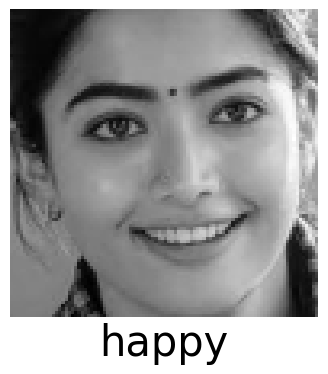

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape and normalize the image
image_array = image_array.reshape(96, 96, 1)
image_array = image_array / 255

test_picture = np.zeros((1, 96, 96, 1))
test_picture[0] = image_array

# 'Model' is trained neural network model
predicted_classes = model.predict(test_picture)
predicted_class_index = np.argmax(predicted_classes, axis=-1)

fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.imshow(test_picture[0].reshape(96, 96), cmap='gray')

label_to_text = {0: 'anger', 1: 'disgust', 2: 'sad', 3: 'happy', 4: 'surprise'}
predicted_label = label_to_text[predicted_class_index[0]]

axes.set_title('{}'.format(predicted_label),fontsize=30, y=-0.15)
axes.axis('off')

output_image_path = '/content/drive/MyDrive/Volkswagen India/Test Image/IMG/predicted_image.png'
plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)

print(predicted_classes)
print(predicted_label)

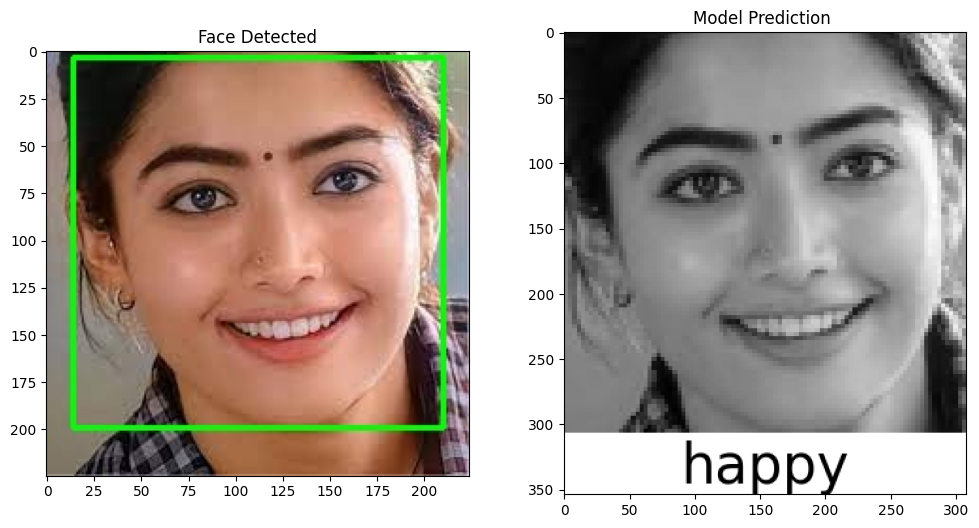

In [12]:
# Read your three images
image1 = cv2.imread('/content/drive/MyDrive/Volkswagen India/Test Image/IMG/detected_face.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Volkswagen India/Test Image/IMG/predicted_image.png')  # Replace with the path to your third image

# Create a figure with three subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image in the first subplot
ax1.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
ax1.set_title('Face Detected')

# Display the second image in the second subplot
ax2.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
ax2.set_title('Model Prediction ')

# Show the figure with all three subplots
plt.show()
